<a href="https://colab.research.google.com/github/MowahiburRahmanTwake/Machine-Learning/blob/main/final_bn_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
datasets = pd.read_csv('/content/drive/MyDrive/Thesis/final_bn_data.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder
Le_x = LabelEncoder()
datasets = datasets.apply(LabelEncoder().fit_transform)

In [4]:
array = datasets.values
x = array[:,0:3]
y = array[:,3]

In [5]:
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

**Decision tree**

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

Fold: 0 0.6
              precision    recall  f1-score   support

           0       0.35      0.41      0.38      1084
           1       0.73      0.68      0.71      2551

    accuracy                           0.60      3635
   macro avg       0.54      0.54      0.54      3635
weighted avg       0.62      0.60      0.61      3635

Fold: 1 0.603576341127923
              precision    recall  f1-score   support

           0       0.38      0.41      0.40      1149
           1       0.72      0.69      0.70      2486

    accuracy                           0.60      3635
   macro avg       0.55      0.55      0.55      3635
weighted avg       0.61      0.60      0.61      3635

Fold: 2 0.5953232462173315
              precision    recall  f1-score   support

           0       0.35      0.38      0.37      1122
           1       0.71      0.69      0.70      2513

    accuracy                           0.60      3635
   macro avg       0.53      0.54      0.53      3635
weighted 

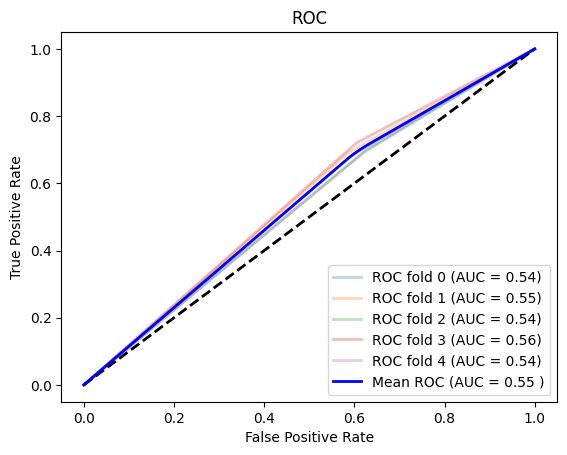

In [7]:
for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
  # Train the classifier
  clf.fit(x_train, y_train)
  # Make predictions
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i, accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [8]:
#  confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 426  713]
 [ 751 1745]]


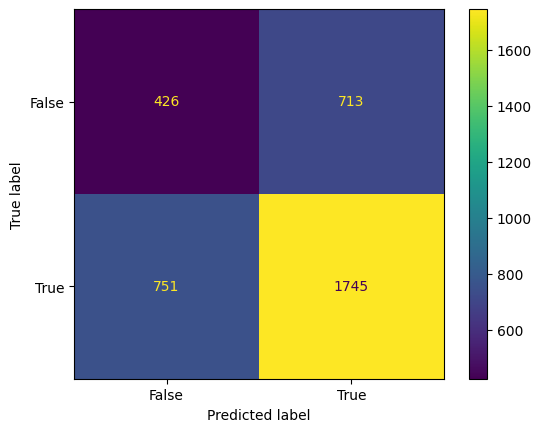

In [9]:
# Confusion matrix of Results from Decision Tree classification
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

**k-nearest neighbors**

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# Create a KNN classifier
clf = KNeighborsClassifier()

Fold: 0 0.6412654745529573
              precision    recall  f1-score   support

           0       0.35      0.24      0.29      1084
           1       0.72      0.81      0.76      2551

    accuracy                           0.64      3635
   macro avg       0.53      0.53      0.52      3635
weighted avg       0.61      0.64      0.62      3635

Fold: 1 0.6291609353507566
              precision    recall  f1-score   support

           0       0.36      0.23      0.28      1149
           1       0.70      0.81      0.75      2486

    accuracy                           0.63      3635
   macro avg       0.53      0.52      0.52      3635
weighted avg       0.59      0.63      0.60      3635

Fold: 2 0.6324621733149931
              precision    recall  f1-score   support

           0       0.36      0.24      0.29      1122
           1       0.70      0.81      0.75      2513

    accuracy                           0.63      3635
   macro avg       0.53      0.52      0.52    

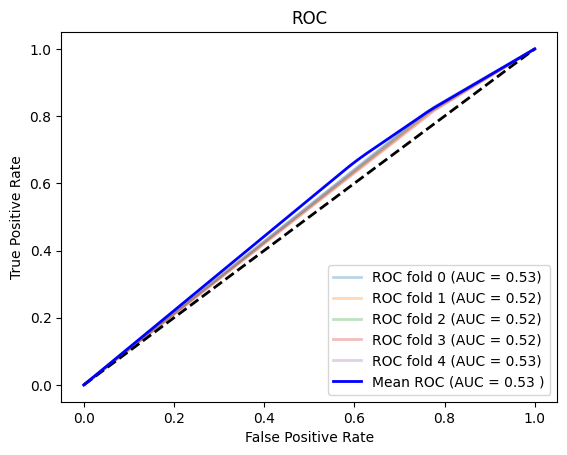

In [12]:
for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
  # Train the classifier
  clf.fit(x_train, y_train)
  # Make predictions
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i, accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [13]:
#  confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 253  886]
 [ 429 2067]]


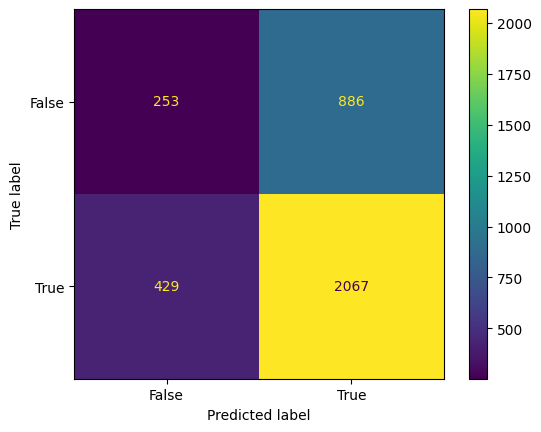

In [14]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

**Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression
# Create the Logistic Regression classifier
clf = LogisticRegression()

Fold: 0 0.7017881705639615
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1084
           1       0.70      1.00      0.82      2551

    accuracy                           0.70      3635
   macro avg       0.35      0.50      0.41      3635
weighted avg       0.49      0.70      0.58      3635

Fold: 1 0.6839064649243466
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1149
           1       0.68      1.00      0.81      2486

    accuracy                           0.68      3635
   macro avg       0.34      0.50      0.41      3635
weighted avg       0.47      0.68      0.56      3635

Fold: 2 0.691334250343879
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1122
           1       0.69      1.00      0.82      2513

    accuracy                           0.69      3635
   macro avg       0.35      0.50      0.41     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

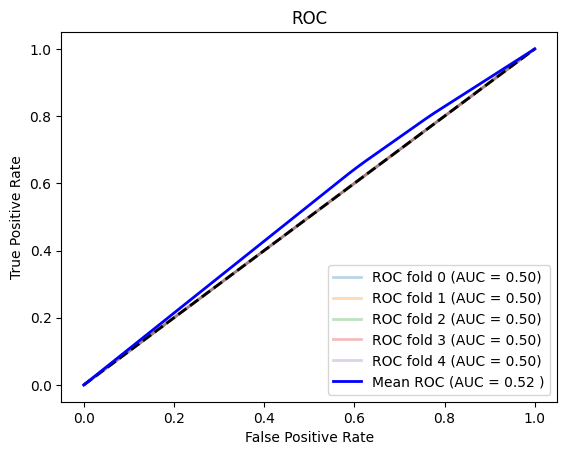

In [16]:
for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
  # Train the classifier
  clf.fit(x_train, y_train)
  # Make predictions
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i, accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [17]:
#  confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[   0 1139]
 [   0 2496]]


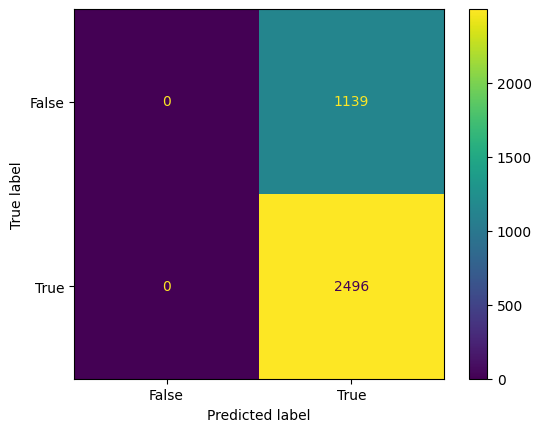

In [18]:
# Confusion matrix of Results from Decision Tree classification
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

**Naive Bayes**

In [19]:
from sklearn.naive_bayes import GaussianNB
# Create the Naive Bayes classifier
clf = GaussianNB()

Fold: 0 0.7017881705639615
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1084
           1       0.70      1.00      0.82      2551

    accuracy                           0.70      3635
   macro avg       0.35      0.50      0.41      3635
weighted avg       0.49      0.70      0.58      3635

Fold: 1 0.6839064649243466
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1149
           1       0.68      1.00      0.81      2486

    accuracy                           0.68      3635
   macro avg       0.34      0.50      0.41      3635
weighted avg       0.47      0.68      0.56      3635

Fold: 2 0.691334250343879
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1122
           1       0.69      1.00      0.82      2513

    accuracy                           0.69      3635
   macro avg       0.35      0.50      0.41     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

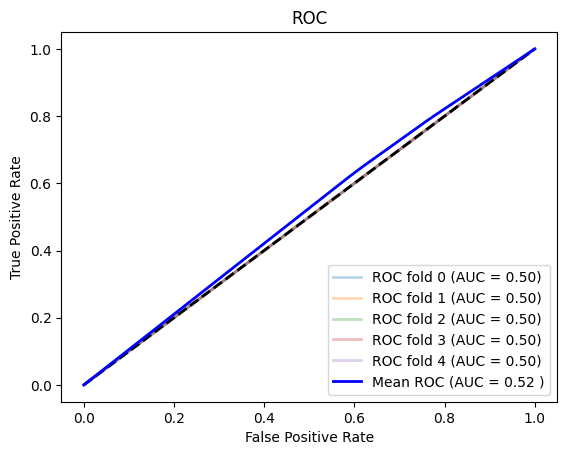

In [20]:
for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
  # Train the classifier
  clf.fit(x_train, y_train)
  # Make predictions
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i, accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [21]:
#  confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[   0 1139]
 [   0 2496]]


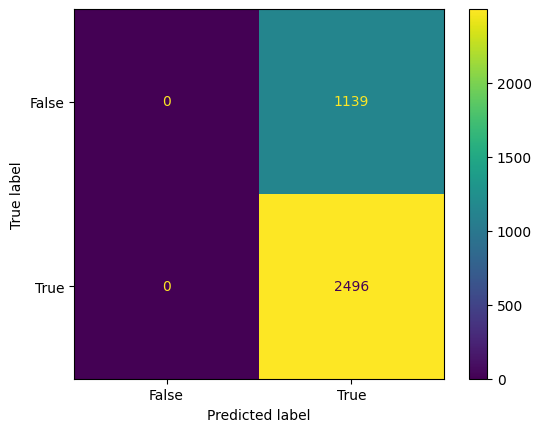

In [22]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Create the Random Forest classifier
clf = RandomForestClassifier()

Fold: 0 0.6558459422283356
              precision    recall  f1-score   support

           0       0.41      0.33      0.37      1084
           1       0.74      0.79      0.76      2551

    accuracy                           0.66      3635
   macro avg       0.57      0.56      0.57      3635
weighted avg       0.64      0.66      0.65      3635

Fold: 1 0.6470426409903713
              precision    recall  f1-score   support

           0       0.42      0.31      0.36      1149
           1       0.72      0.80      0.76      2486

    accuracy                           0.65      3635
   macro avg       0.57      0.56      0.56      3635
weighted avg       0.62      0.65      0.63      3635

Fold: 2 0.6618982118294361
              precision    recall  f1-score   support

           0       0.44      0.34      0.38      1122
           1       0.73      0.81      0.77      2513

    accuracy                           0.66      3635
   macro avg       0.58      0.57      0.57    

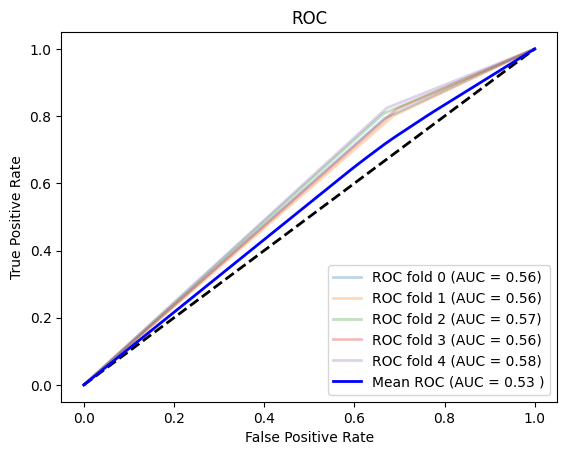

In [25]:
for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
  # Train the classifier
  clf.fit(x_train, y_train)
  # Make predictions
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i, accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [26]:
#  confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 374  765]
 [ 439 2057]]


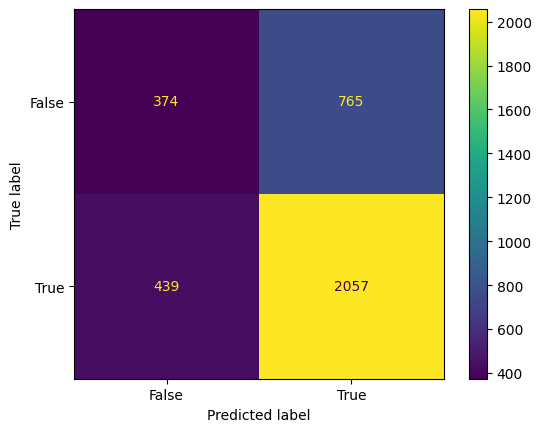

In [27]:
# Confusion matrix of Results from Decision Tree classification
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

**SVM**

In [28]:
from sklearn.svm import SVC
# Create the SVM classifier
clf = SVC()

Fold: 0 0.7017881705639615
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1084
           1       0.70      1.00      0.82      2551

    accuracy                           0.70      3635
   macro avg       0.35      0.50      0.41      3635
weighted avg       0.49      0.70      0.58      3635



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold: 1 0.6839064649243466
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1149
           1       0.68      1.00      0.81      2486

    accuracy                           0.68      3635
   macro avg       0.34      0.50      0.41      3635
weighted avg       0.47      0.68      0.56      3635



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold: 2 0.691334250343879
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1122
           1       0.69      1.00      0.82      2513

    accuracy                           0.69      3635
   macro avg       0.35      0.50      0.41      3635
weighted avg       0.48      0.69      0.57      3635



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold: 3 0.6888583218707015
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1131
           1       0.69      1.00      0.82      2504

    accuracy                           0.69      3635
   macro avg       0.34      0.50      0.41      3635
weighted avg       0.47      0.69      0.56      3635



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold: 4 0.6866574965612104
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1139
           1       0.69      1.00      0.81      2496

    accuracy                           0.69      3635
   macro avg       0.34      0.50      0.41      3635
weighted avg       0.47      0.69      0.56      3635



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


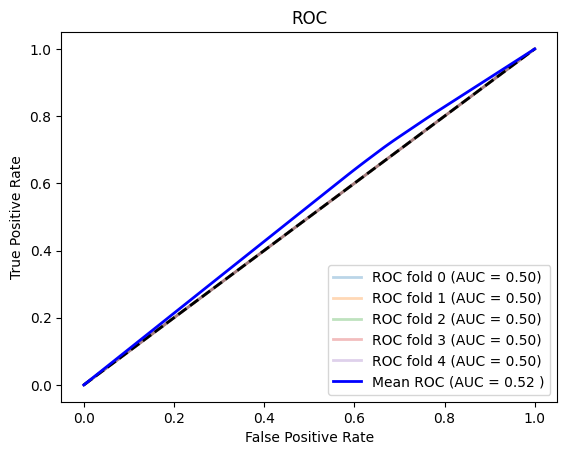

In [29]:
for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
  # Train the classifier
  clf.fit(x_train, y_train)
  # Make predictions
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i, accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [30]:
#  confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[   0 1139]
 [   0 2496]]


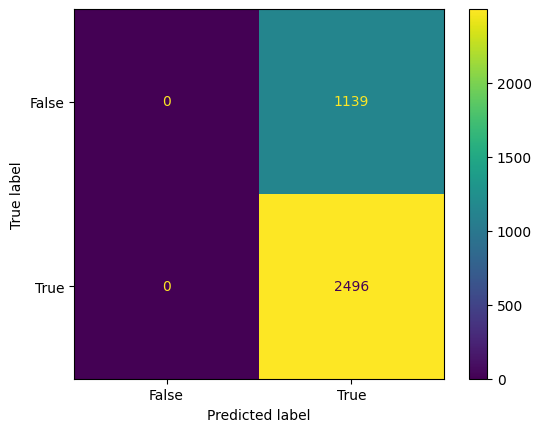

In [31]:
# Confusion matrix of Results from Decision Tree classification
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()